In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline


In [2]:
file=pd.read_csv("bank.csv",header=0,sep=';')

In [3]:

file.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [4]:
print(file.shape)
file['education'].index

(4521, 17)


RangeIndex(start=0, stop=4521, step=1)

# Exploring Data

no     4000
yes     521
Name: y, dtype: int64


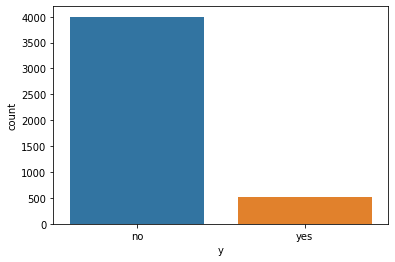

In [5]:
print(file['y'].value_counts())
sns.countplot(x='y',data=file)
plt.show()

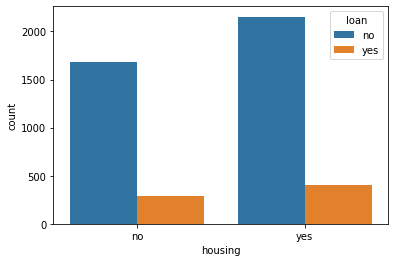

In [6]:
sns.countplot(x='housing',hue="loan",data=file)
plt.show()

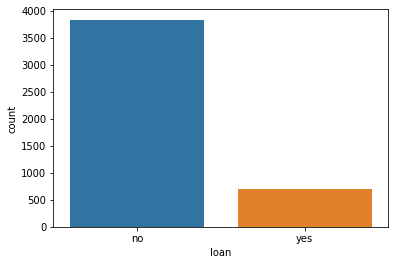

In [7]:
sns.countplot(x='loan',data=file)
plt.show()

In [8]:
print(file['marital'].value_counts())
print()
print(file['education'].value_counts())
print()
print(file['education'].unique())

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

['primary' 'secondary' 'tertiary' 'unknown']


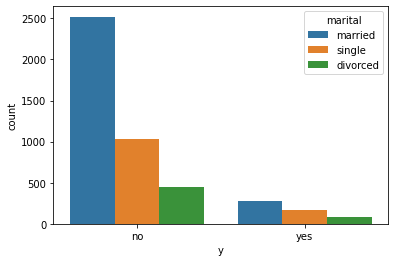

In [9]:
sns.countplot(x='y',hue='marital',data=file)
plt.show()

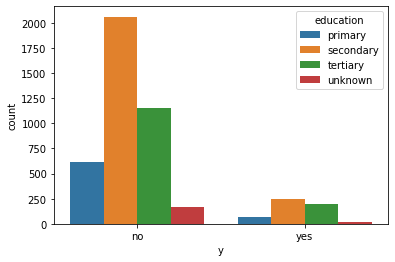

In [10]:
sns.countplot(x='y',hue='education',data=file)
plt.show()

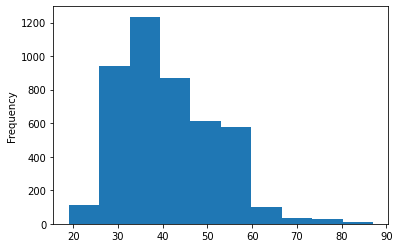

In [11]:
file['age'].plot.hist()
plt.show()

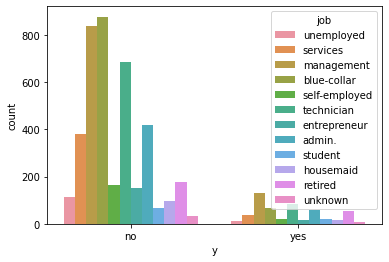

In [12]:
sns.countplot(x='y',hue='job',data=file)
plt.show()

In [13]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


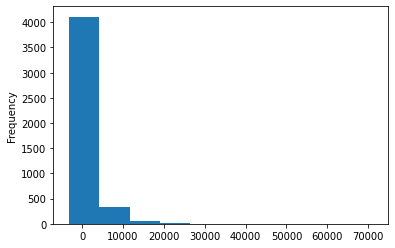

In [14]:
file['balance'].plot.hist()
plt.show()

# Cleaning the Data

Once we anayzise the relation between differnt features, we move forward to clean the data and make them ready for trining our model.

print(file.isnull().any())
print()
print(file.isnull().sum())

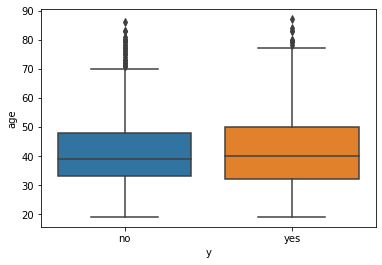

In [15]:
sns.boxplot(x='y',y="age",data=file)
plt.show()

Lets drop some unwanted features and NaN values

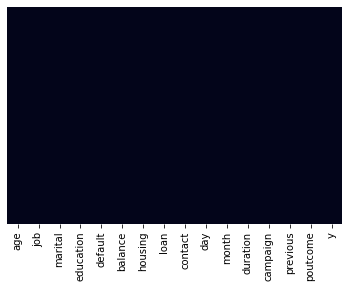

In [16]:
file.drop("pdays",axis=1,inplace=True)
sns.heatmap(file.isnull(),yticklabels=False,cbar=False)
plt.show()

In [17]:
file.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,4,failure,no


Converting variable into catgorical data

In [18]:
job=pd.get_dummies(file['job'],drop_first=True)
print(job.head(2))
print()
marital=pd.get_dummies(file["marital"],drop_first=True)
print(marital.head(2))
print()
education=pd.get_dummies(file["education"],drop_first=True)
print(education.head(2))
# print()
# housing=pd.get_dummies(file["housing"],drop_first=True)
# print(housing.head(2))
# print()
# loan=pd.get_dummies(file['loan'],drop_first=True)
# print(loan.head(2))
y=pd.get_dummies(file['y'],drop_first=True)
print()
print(y.head(2))

   blue-collar  entrepreneur  housemaid  management  retired  self-employed  \
0            0             0          0           0        0              0   
1            0             0          0           0        0              0   

   services  student  technician  unemployed  unknown  
0         0        0           0           1        0  
1         1        0           0           0        0  

   married  single
0        1       0
1        1       0

   secondary  tertiary  unknown
0          0         0        0
1          1         0        0

   yes
0    0
1    0


Lets Concatinate these data into dataframe


In [20]:
file=pd.concat([file,job,marital,education,y],axis=1)
file.head(2)
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            4521 non-null   int64 
 1   job            4521 non-null   object
 2   marital        4521 non-null   object
 3   education      4521 non-null   object
 4   default        4521 non-null   object
 5   balance        4521 non-null   int64 
 6   housing        4521 non-null   object
 7   loan           4521 non-null   object
 8   contact        4521 non-null   object
 9   day            4521 non-null   int64 
 10  month          4521 non-null   object
 11  duration       4521 non-null   int64 
 12  campaign       4521 non-null   int64 
 13  previous       4521 non-null   int64 
 14  poutcome       4521 non-null   object
 15  y              4521 non-null   object
 16  blue-collar    4521 non-null   uint8 
 17  entrepreneur   4521 non-null   uint8 
 18  housemaid      4521 non-null

Lets drop those column whose dummy variables are just been made

In [21]:
file.drop(['job','marital','education','default','housing','loan','contact','day','month','duration','campaign','previous','poutcome','y'],axis=1,inplace=True)

In [22]:
file.head(5)

,age,balance,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,married,single,secondary,tertiary,unknown,yes
0,30,1787,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,33,4789,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
2,35,1350,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,30,1476,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
4,59,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


Its time to train and and test the data

In [23]:
x=file.drop('yes',axis=1)
y=file['yes']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [25]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_predict=log_reg.predict(x_test)

In [33]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1198
           1       0.00      0.00      0.00       159

    accuracy                           0.88      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.78      0.88      0.83      1357



/Users/raven_of_asgards/opt/anaconda3/envs/virtual_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Calculating Errors

In [27]:
abs_error=metrics.mean_absolute_error(y_predict,y_test)
abs_sqr=metrics.mean_squared_error(y_predict,y_test)
mean_sqrt=np.sqrt(abs_sqr)

In [28]:
print("The mean absolute error is: "+ str(abs_error))
print("The mean square error is: "+ str(abs_sqr))
print("The mean square root error is: "+ str(mean_sqrt))

The mean absolute error is: 0.11717022844509949
The mean square error is: 0.11717022844509949
The mean square root error is: 0.34230137079056444


In [29]:
confusion_matrix(y_predict,y_test)

array([[1198,  159],
       [   0,    0]])

In [30]:
(accuracy_score(y_predict,y_test))*100

88.28297715549004

In [32]:
coef=pd.DataFrame({'coeff': log_reg.coef_.flatten()})
print(coef)
print()
print("The intercept for beta_0 is: "+str(log_reg.intercept_))

       coeff
0  -0.000087
1   0.000008
2  -0.827921
3  -0.271760
4  -0.059044
5  -0.147509
6   0.691696
7  -0.042811
8  -0.375906
9   0.227949
10 -0.247308
11 -0.198518
12  0.029281
13 -0.721010
14 -0.142638
15 -0.244504
16 -0.017986
17 -0.155473

The intercept for beta_0 is: [-1.24080943]


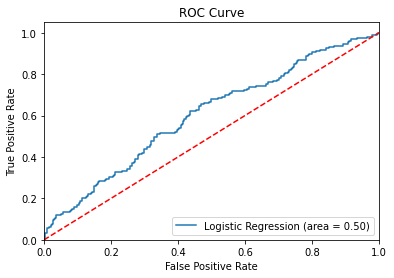

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
